In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#reading the csv file
df=pd.read_csv('C://insurance.csv')

In [20]:
df.head() #head of the data. First five rows.

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### 3)) a) Shape of the data

In [21]:
df.shape #shape of the data

(1338, 7)

### b)Data type of each attribute

In [22]:
df.dtypes #checking the data types

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

### c)Check the presence of missing values

In [72]:
null = df.isnull()
print(null.head())
print('-'*60)
print('Missing values in each column -')
print(null.sum())

     age    sex    bmi  children  smoker  region  expenses
0  False  False  False     False   False   False     False
1  False  False  False     False   False   False     False
2  False  False  False     False   False   False     False
3  False  False  False     False   False   False     False
4  False  False  False     False   False   False     False
------------------------------------------------------------
Missing values in each column -
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64


### d) 5 point summary of numerical attributes

In [87]:
# numerical attributes - age, bmi, children, expenses
df_tmp=df.describe()
df_summary=df_tmp.loc[['min','25%','50%','75%','max']]
df_summary=df_summary.rename(index={'25%':'Q1','50%':'Q2','75%':'Q3'})

#5-number-summary
df_summary

,age,bmi,children,expenses
min,18.0,16.0,0.0,1121.8700
Q1,27.0,26.3,0.0,4740.2875
Q2,39.0,30.4,1.0,9382.0300
Q3,51.0,34.7,2.0,16639.9150
max,64.0,53.1,5.0,63770.4300


In [70]:
# overall summary of dataset numerical attributes
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


### e) Distribution of 'bmi', 'age' and 'expenses' columns

In [86]:
df_new=df['bmi age expenses'.split()]
df_new.head()

,bmi,age,expenses
0,27.9,19,16884.92
1,33.8,18,1725.55
2,33.0,28,4449.46
3,22.7,33,21984.47
4,28.9,32,3866.86


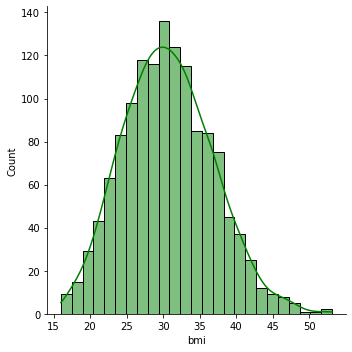

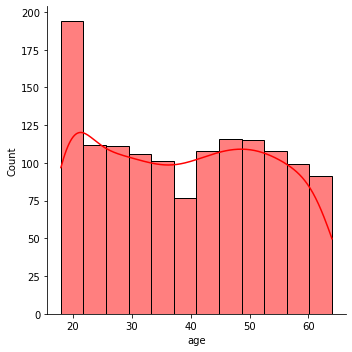

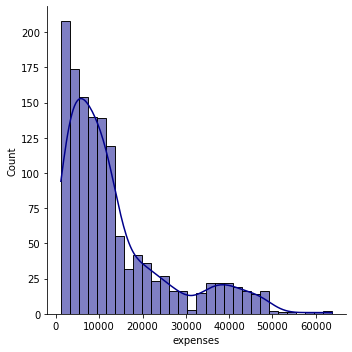

In [112]:
sns.displot(df_new['bmi'],kde=True,color='green')
plt.show()
sns.displot(df_new['age'],kde=True,color='red')
plt.show()
sns.displot(df_new['expenses'],kde=True,color='darkblue')
plt.show()

### f) Measure of skewness of 'bmi', 'age' and 'expenses' columns

In [122]:
skewVal=df_new.skew(axis=0,skipna=True)
print('Skewness of the respective columns -')
skewVal

Skewness of the respective columns -


bmi         0.284593
age         0.055673
expenses    1.515880
dtype: float64

### g)  Checking the presence of outliers in ‘bmi’, ‘age’ and ‘expenses' columns

<AxesSubplot:>

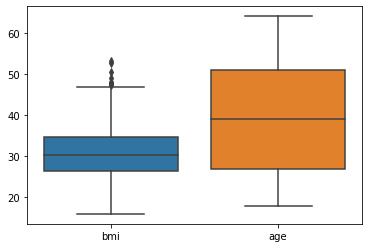

In [123]:
sns.boxplot(data=df['bmi age'.split()])

<AxesSubplot:>

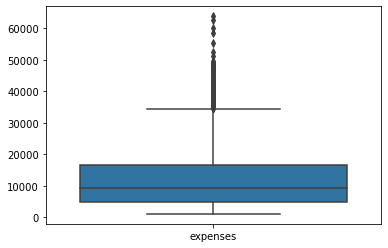

In [126]:
sns.boxplot(data=df['expenses'.split()])

In [220]:
data_new=df['age bmi expenses'.split()]

In [223]:
from scipy import stats
data_filtered=data_new[(np.abs(stats.zscore(data_new)) < 3).all(axis=1)]
data_filtered.shape

(1327, 3)

Description:

1.For each column, it first computes the Z-score of each value in the column, relative to the column mean and standard deviation.

2.It then takes the absolute Z-score because the direction does not matter, only if it is below the threshold.
all(axis=1) ensures that for each row, all column satisfy the constraint.

3.Finally, the result of this condition is used to index the dataframe.


### h) Distribution of categorical columns(include children)

In [183]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [221]:
ds=df.copy()
ds.drop('expenses age bmi'.split(),axis=1,inplace=True)
print("New Dataset")
print(ds.head())
print('-'*40)
print('Original Dataset')
print(df.head())

New Dataset
      sex  children smoker     region
0  female         0    yes  southwest
1    male         1     no  southeast
2    male         3     no  southeast
3    male         0     no  northwest
4    male         0     no  northwest
----------------------------------------
Original Dataset
   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


In [189]:
ds['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

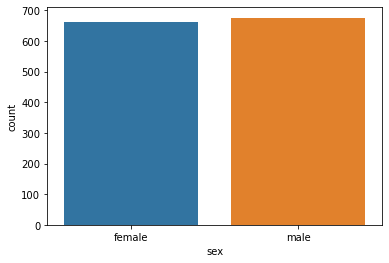

In [191]:
sns.countplot(x='sex',data=ds)

<AxesSubplot:xlabel='smoker', ylabel='count'>

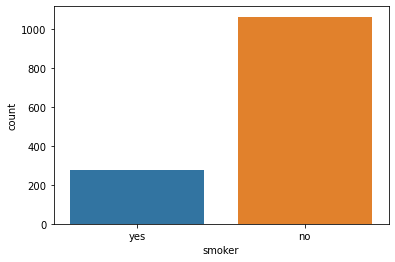

In [192]:
sns.countplot(x='smoker',data=ds)

<AxesSubplot:xlabel='region', ylabel='count'>

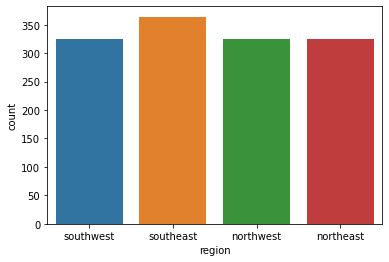

In [193]:
sns.countplot(x='region',data=ds)

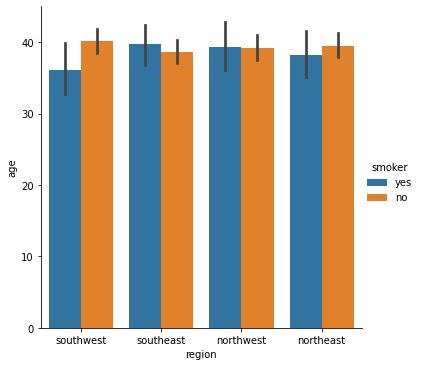

In [195]:
#Distribution of categorical columns by region and age

sns.catplot(x="region",y="age",hue="smoker",data=df,kind="bar")

<AxesSubplot:xlabel='region', ylabel='age'>

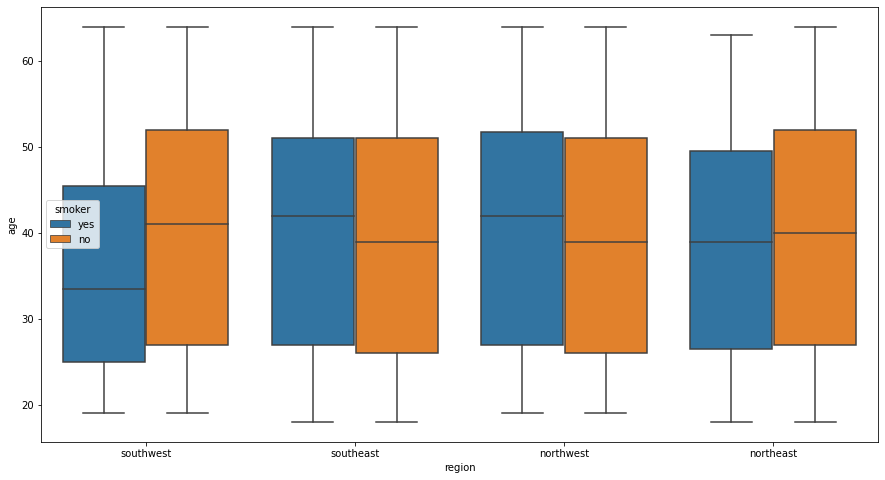

In [196]:
plt.figure(figsize=(15,8))
sns.boxplot(x='region',y='age',hue='smoker',data=df)

### i) Pair plot that includes all the columns of the data frame

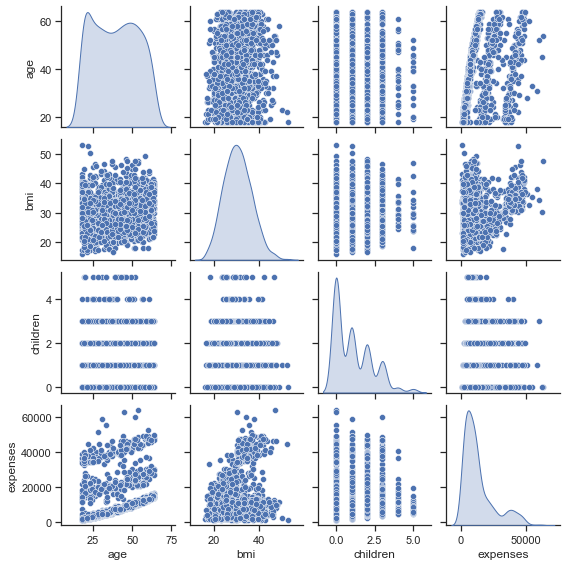

In [197]:
sns.set(style='ticks', color_codes=False)

g = sns.pairplot(df,height=2,diag_kind='kde')

In [198]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [199]:
# Replacing string values to numbers
df['sex'] = df['sex'].apply({'male':0, 'female':1}.get) 
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [200]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,1,16884.92
1,18,0,33.8,1,0,2,1725.55
2,28,0,33.0,3,0,2,4449.46
3,33,0,22.7,0,0,3,21984.47
4,32,0,28.9,0,0,3,3866.86


# 4)Answer the questions with statistical evidence


#### A. Do charges of people who smoke differ significantly from the people who don't?

Hypothesis

#### Null Hypothesis:
Charges of people who smoke differ significantly from people who don't


#### Alternative Hypothesis:
Charges of people who smoke does not differ significantly from people who don't

Text(0.5, 1.0, 'Overall distribution of charges comparing smokers and non-smokers')

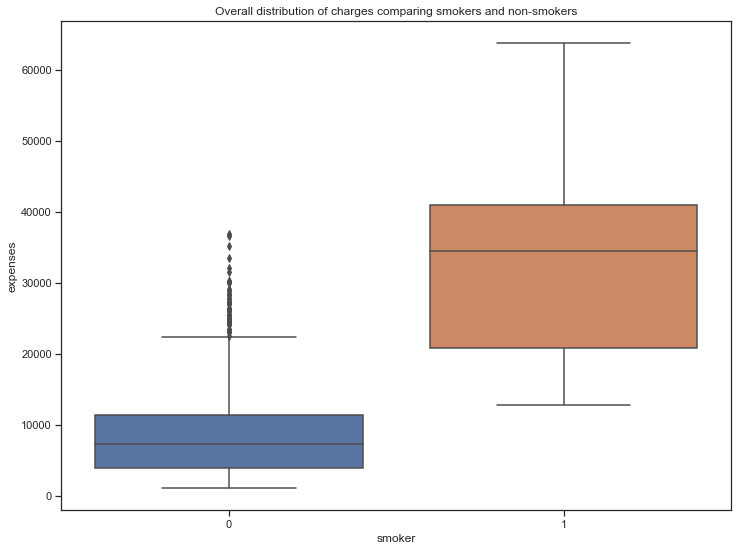

In [202]:
#boxplot showing the distribution of charges of smokers and non-smokers
plt.figure(figsize=(12,9))
sns.boxplot(x='smoker',y='expenses',data=df)
plt.title("Overall distribution of charges comparing smokers and non-smokers")

Also confirming with a joinplot



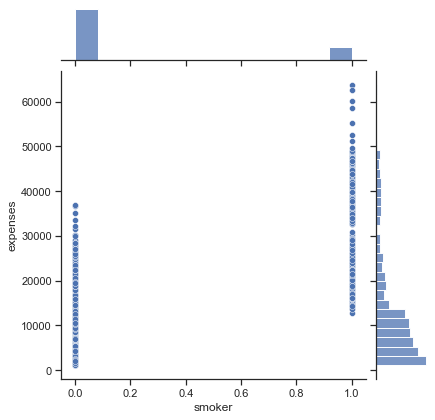

In [204]:
# Correlation betweeen 'charges' and 'smoker' 
sns.jointplot(x=df['smoker'],y=df['expenses'])

As can be seen from the above demonstrations, the p-value is computed as 0.0 , which is significantly smaller than the 0.05% confidence level. Therefore, we can conclude that the bmi of males differ significantly from bmi of females and therefore we fail to reject our null hypothesis

### B.Is the proportion of smokers significantly different in different genders?
Hypothesis

#### Null Hypothesis:

Proportion of smokers is significantly different in different genders

#### Alternative Hypothesis:

Proportion of smokers is not significantly different in different genders

In [205]:
df=pd.read_csv('C://insurance.csv')

In [206]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [208]:
df.count() #count of all the columns in the data set

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
expenses    1338
dtype: int64

In [209]:
female_smokers=(df['sex']=='female') & (df['smoker']=='yes')
female_smokers

0        True
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337     True
Length: 1338, dtype: bool

In [210]:
female_smokers.value_counts()

False    1223
True      115
dtype: int64

In [212]:
male_smokers=(df['sex']=='male') & (df['smoker']=='yes')

In [213]:
male_smokers.value_counts()

False    1179
True      159
dtype: int64

In [214]:
#proportion of females who smoke
115/1338*100

8.594917787742899

In [215]:
#proportion of males who smoke
159/1338*100

11.883408071748878

From the above demonstration, the proportion of females who smoke are 8.59% while the proportion of males who smoke are 11.88% (3.29% differece) which indicates that the proportion of smokers is significantly different in different genders and we therefore fail to reject our null hypothesis.

### D. Is the distribution of bmi across women with no children, one child and two children, the same?

Hypothesis

#### Null Hypothesis:

distribution of bmi across women with no children, one child and two children are the same

#### Alternative Hypothesis:

distribution of bmi across women with no children, one child and two children, are not same

In [217]:
df_new=df[df['children']<3]
df_new.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62


Text(0.5, 1.0, 'Distribution of bmi across women with no children, one child and two children')

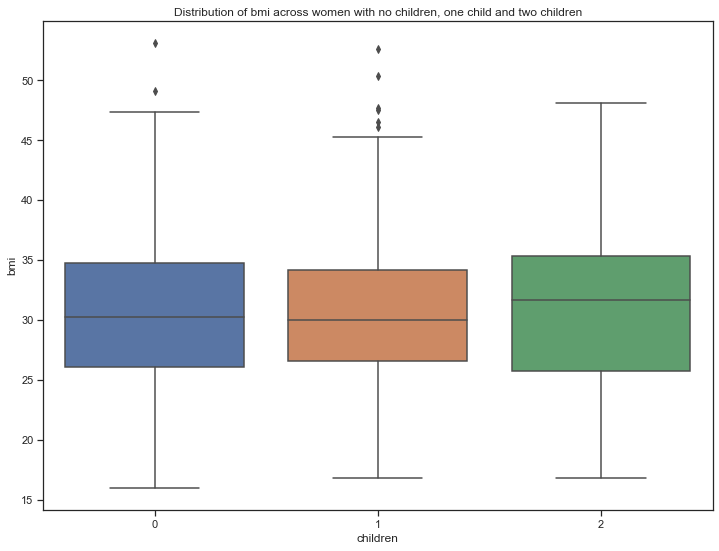

In [218]:
plt.figure(figsize=(12,9))
sns.boxplot(x=df_new['children'],y=df_new['bmi'],data=df_new)
plt.title("Distribution of bmi across women with no children, one child and two children")

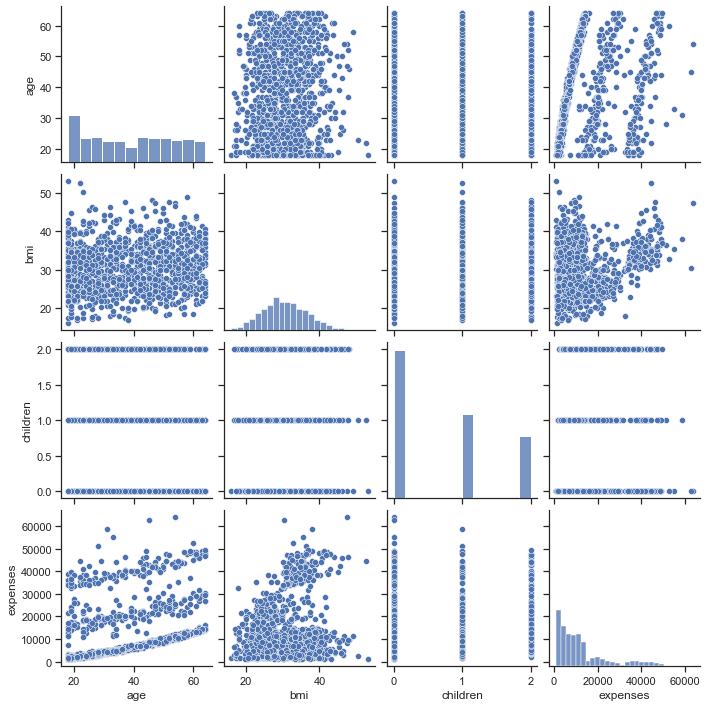

In [219]:
sns.pairplot(df_new)

It is clearly seen from the above scatter plot as well as the distplot and the pairplot that the distribution of bmi across women with no children, one child and two children are not the same. We therefore fail to accept our null hypothesis.